In [151]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

In [152]:
filepath = "../../Data/QMEF/C20-USD.csv"
df_c20 = pd.read_csv(filepath)
df_c20['Date'] = pd.to_datetime(df_c20['Date'])
df_c20['Mean_Price'] = (df_c20['Open'] + df_c20['Adj Close'])/2
df_c20['Date'] = pd.to_datetime(df_c20['Date'])
df_c20['Date'] = df_c20['Date'].dt.date

df_c20 = df_c20[~(df_c20['Date'] < pd.to_datetime('2020-04-27'))]
df_c20 = df_c20[~(df_c20['Date'] > pd.to_datetime('2021-11-16'))]

adj_close = df_c20['Adj Close'].to_list()
returns = [0]
for i in range(1, len(df_c20['Adj Close'])):
    returns.append(adj_close[i] / adj_close[i-1] -1)
df_c20['C20_Returns'] = returns

df_c20

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


,Date,Open,High,Low,Close,Adj Close,Volume,Mean_Price,C20_Returns
826,2020-04-27,0.473394,0.478759,0.433498,0.444358,0.444358,1130,0.458876,0.000000
827,2020-04-28,0.444428,0.459052,0.438889,0.448848,0.448848,5752,0.446638,0.010104
828,2020-04-29,0.448588,0.549034,0.445800,0.504459,0.504459,15576,0.476523,0.123897
829,2020-04-30,0.504172,0.652998,0.468687,0.641246,0.641246,8885,0.572709,0.271156
830,2020-05-01,0.641246,0.657692,0.493964,0.502737,0.502737,8402,0.571991,-0.216000
...,...,...,...,...,...,...,...,...,...
1390,2021-11-12,6.023932,6.133237,5.734855,5.839687,5.839687,32408,5.931809,-0.029724
1391,2021-11-13,5.838492,5.906067,5.578907,5.622639,5.622639,19161,5.730565,-0.037168
1392,2021-11-14,5.638788,5.783105,5.489355,5.690819,5.690819,31240,5.664803,0.012126
1393,2021-11-15,5.686074,5.849085,5.556268,5.579507,5.579507,37627,5.632791,-0.019560


In [153]:
filepath = "../../Data/QMEF/DOGE-USD.csv"
df_doge = pd.read_csv(filepath)
df_doge['Date'] = pd.to_datetime(df_doge['Date'])
df_doge.drop([1759, 1760], inplace=True) # na-Wert in der vorletzten Zeile. Deshalb die letzten beiden Zeilen entfernt.
df_doge['Mean_Price'] = (df_doge['Open'] + df_doge['Adj Close'])/2
df_doge['Date'] = df_doge['Date'].dt.date

adj_close = df_doge['Adj Close'].to_list()
returns = [0]
for i in range(1, len(df_doge['Adj Close'])):
    returns.append(adj_close[i] / adj_close[i-1] -1)
df_doge['Returns'] = returns

# Excess Returns können später berechnet werden, wenn die RF haben.
df_doge['Excess_Returns'] = returns

df_doge = df_doge[~(df_doge['Date'] < pd.to_datetime('2020-04-28'))]
df_doge = df_doge[~(df_doge['Date'] > pd.to_datetime('2021-11-16'))]

df_doge = pd.merge(df_doge, df_c20[['Date', 'C20_Returns']], left_on='Date', right_on='Date')

df_doge


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


,Date,Open,High,Low,Close,Adj Close,Volume,Mean_Price,Returns,Excess_Returns,C20_Returns
0,2020-04-28,0.002354,0.002372,0.002322,0.002339,0.002339,2.549055e+08,0.002347,-0.006794,-0.006794,0.010104
1,2020-04-29,0.002339,0.002542,0.002331,0.002517,0.002517,2.956982e+08,0.002428,0.076101,0.076101,0.123897
2,2020-04-30,0.002517,0.002689,0.002392,0.002443,0.002443,2.985638e+08,0.002480,-0.029400,-0.029400,0.271156
3,2020-05-01,0.002444,0.002559,0.002441,0.002494,0.002494,2.828870e+08,0.002469,0.020876,0.020876,-0.216000
4,2020-05-02,0.002495,0.002553,0.002473,0.002549,0.002549,2.691553e+08,0.002522,0.022053,0.022053,-0.314035
...,...,...,...,...,...,...,...,...,...,...,...
563,2021-11-12,0.260937,0.268437,0.249457,0.259414,0.259414,1.563007e+09,0.260176,-0.006712,-0.006712,-0.029724
564,2021-11-13,0.259618,0.262251,0.254540,0.261706,0.261706,9.238379e+08,0.260662,0.008835,0.008835,-0.037168
565,2021-11-14,0.261591,0.271257,0.260275,0.262912,0.262912,1.264557e+09,0.262251,0.004608,0.004608,0.012126
566,2021-11-15,0.262870,0.265170,0.256367,0.256529,0.256529,1.028469e+09,0.259699,-0.024278,-0.024278,-0.019560


In [154]:
exog = sm.add_constant(df_doge['C20_Returns'], prepend=False)
mod = sm.OLS(df_doge['Excess_Returns'], exog)
res = mod.fit()
print(res.summary())

beta = res.params[0] # C20_Returns
alpha = res.params[1] # const

# Expected Return via CAPM
df_doge['Expected_Return_CAPM'] = beta*df_doge['C20_Returns']
df_doge['Abnormal_Returns'] = df_doge['Returns'] - df_doge['Expected_Return_CAPM']

                            OLS Regression Results                            
Dep. Variable:         Excess_Returns   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     25.26
Date:                Sun, 25 Jun 2023   Prob (F-statistic):           6.72e-07
Time:                        14:29:52   Log-Likelihood:                 180.27
No. Observations:                 568   AIC:                            -356.5
Df Residuals:                     566   BIC:                            -347.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
C20_Returns     0.5749      0.114      5.026      

In [155]:
df_tweets = pd.read_csv("../../Data/QMEF/tweet_analysis.csv", sep=";", encoding='utf8', parse_dates=['CreatedAt', 'UTC'])
df_tweets['Date'] = df_tweets['UTC'].dt.date
df_tweets.drop_duplicates('TweetId', inplace = True)
df_tweets = df_tweets.loc[(df_tweets['Favorites'] >= 100_000) & (df_tweets['Retweets'] >= 50_000)]
df_tweets = df_tweets.merge(df_doge, left_on='Date', right_on='Date')
df_tweets[['Text', 'Favorites', 'Retweets', 'Date', 'Volume', 'Mean_Price', 'neg', 'neu', 'pos', 'compound']]
#df_tweets

,Text,Favorites,Retweets,Date,Volume,Mean_Price,neg,neu,pos,compound
0,"Bought some Dogecoin for lil X, so he can be a...",548940,59215,2021-02-10,6.785088e+09,0.071503,0.000,1.000,0.000,0.0000
1,The Dogefather SNL May 8,465278,80539,2021-04-28,1.446434e+10,0.297978,0.000,1.000,0.000,0.0000
2,Do you want Tesla to accept Doge?,386790,98651,2021-05-11,1.456698e+10,0.472859,0.000,0.562,0.438,0.4404
3,Working with Doge devs to improve system trans...,512735,84083,2021-05-13,1.866317e+10,0.441275,0.000,0.497,0.503,0.7964
4,"No highs, no lows, only Doge",773919,113814,2021-02-04,1.304084e+10,0.045258,0.253,0.346,0.401,0.0721
5,Dogecoin is the people’s crypto,554302,103909,2021-02-04,1.304084e+10,0.045258,0.000,1.000,0.000,0.0000
6,Doge Barking at the Moon https://t.co/QFB81D7zOL,336465,50802,2021-04-15,1.791662e+10,0.151687,0.000,1.000,0.000,0.0000
7,SpaceX is going to put a literal Dogecoin on t...,547562,53429,2021-04-01,5.816047e+09,0.057820,0.000,1.000,0.000,0.0000
8,SpaceX launching satellite Doge-1 to the moon ...,537909,118943,2021-05-09,4.613806e+10,0.602945,0.000,1.000,0.000,0.0000
9,🎶 Who let the Doge out 🎶,787296,114617,2021-02-07,1.426102e+10,0.068142,0.000,1.000,0.000,0.0000


Text(0, 0.5, '$ Price')

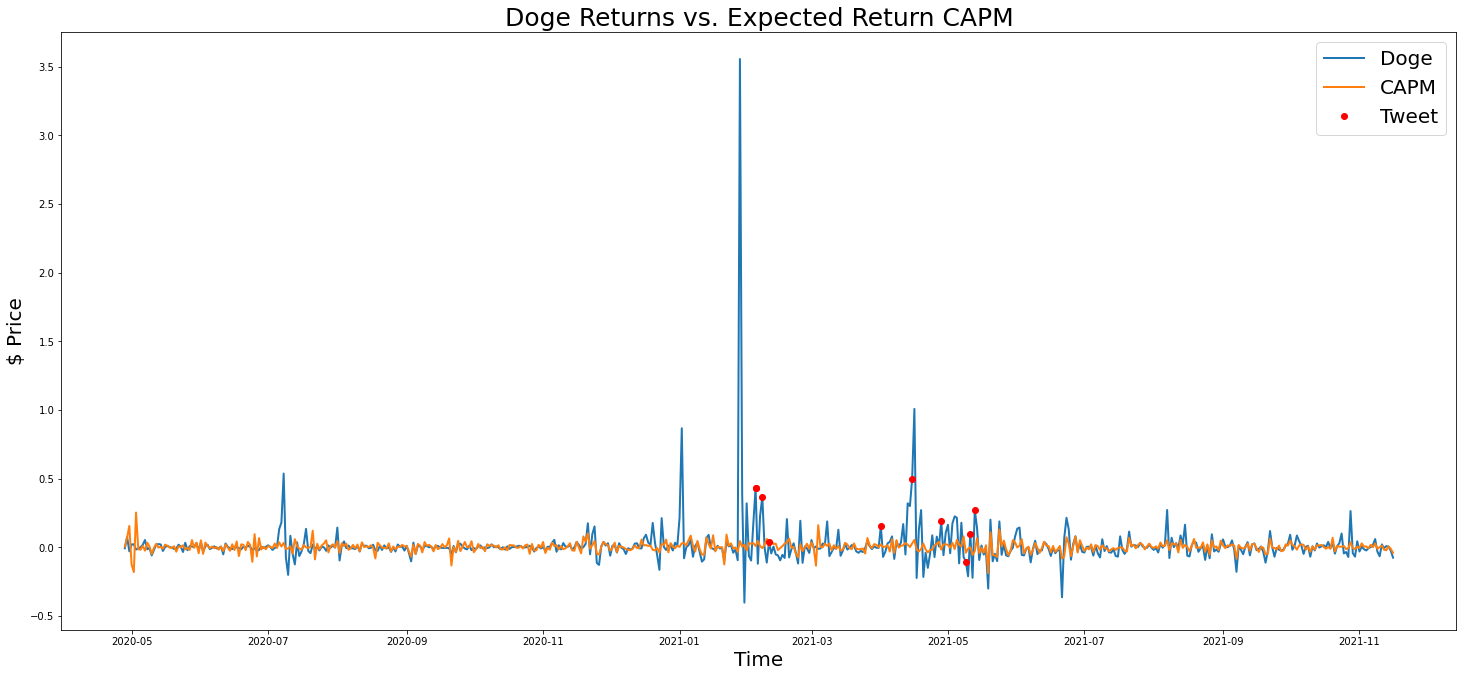

In [156]:
plt.figure(figsize = (25, 11))
plt.plot(df_doge["Date"], df_doge["Returns"], lw=2, label='Doge')
plt.plot(df_doge["Date"], df_doge["Expected_Return_CAPM"], lw=2, label="CAPM")

plt.plot(df_tweets['Date'], df_tweets["Returns"], '.r', markersize=12, label='Tweet')
plt.legend(loc='best', fontsize=20)
plt.title("Doge Returns vs. Expected Return CAPM", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

Text(0, 0.5, '$ Price')

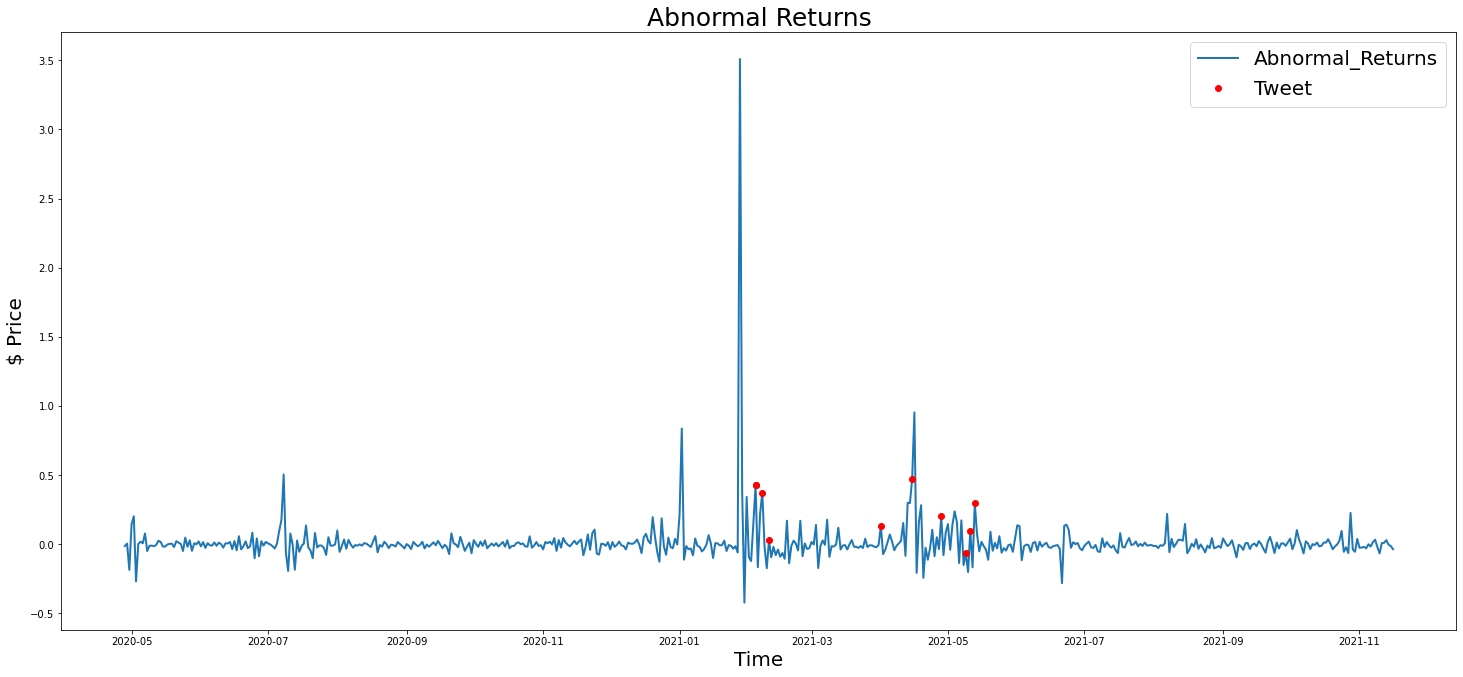

In [157]:
plt.figure(figsize = (25, 11))
plt.plot(df_doge["Date"], df_doge["Abnormal_Returns"], lw=2, label="Abnormal_Returns")
plt.plot(df_tweets['Date'], df_tweets["Abnormal_Returns"], '.r', markersize=12, label='Tweet')
plt.legend(loc='best', fontsize=20)
plt.title("Abnormal Returns", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

Text(0, 0.5, '$ Price')

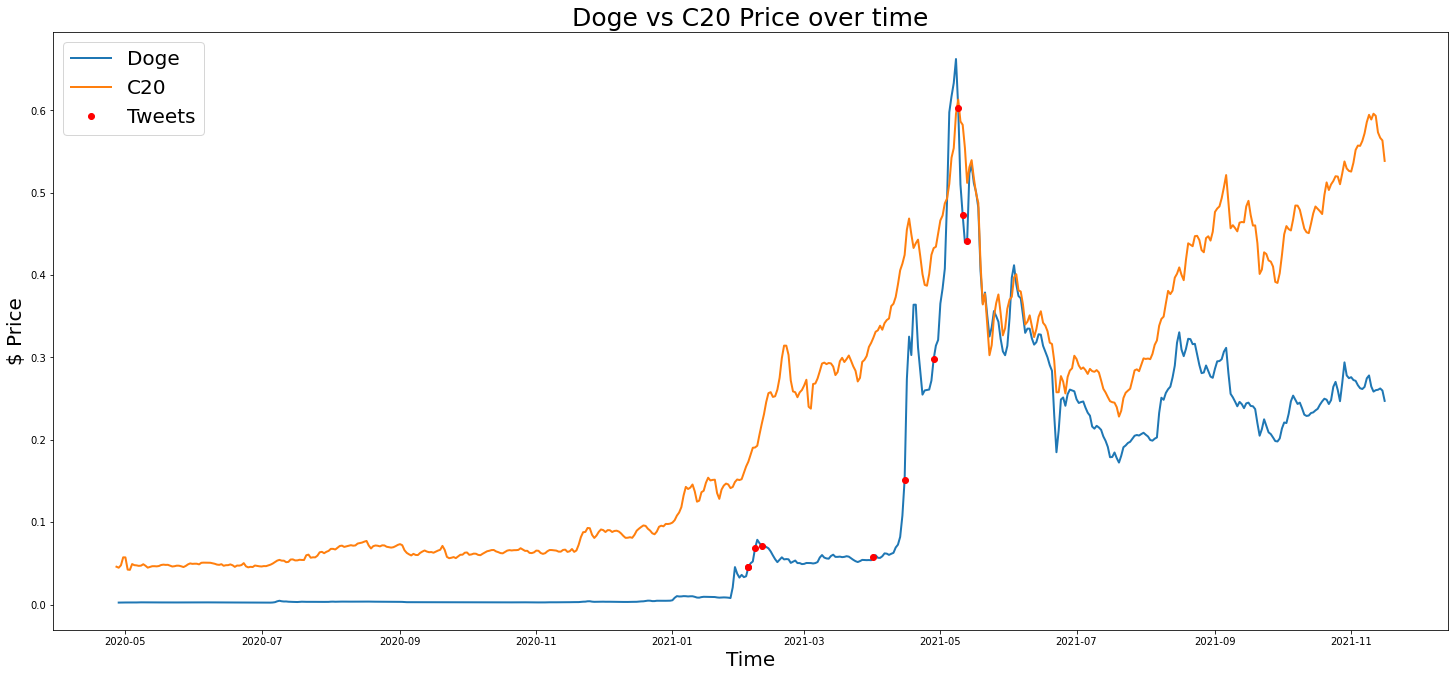

In [158]:
plt.figure(figsize = (25, 11))
plt.plot(df_doge["Date"], df_doge["Mean_Price"], lw=2, label='Doge')
plt.plot(df_c20["Date"], df_c20["Mean_Price"]/10, lw=2, label='C20')
plt.plot(df_tweets['Date'], df_tweets["Mean_Price"], '.r', markersize=12, label='Tweets')
plt.legend(loc='best', fontsize=20)
plt.title("Doge vs C20 Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

Text(0, 0.5, 'Volume')

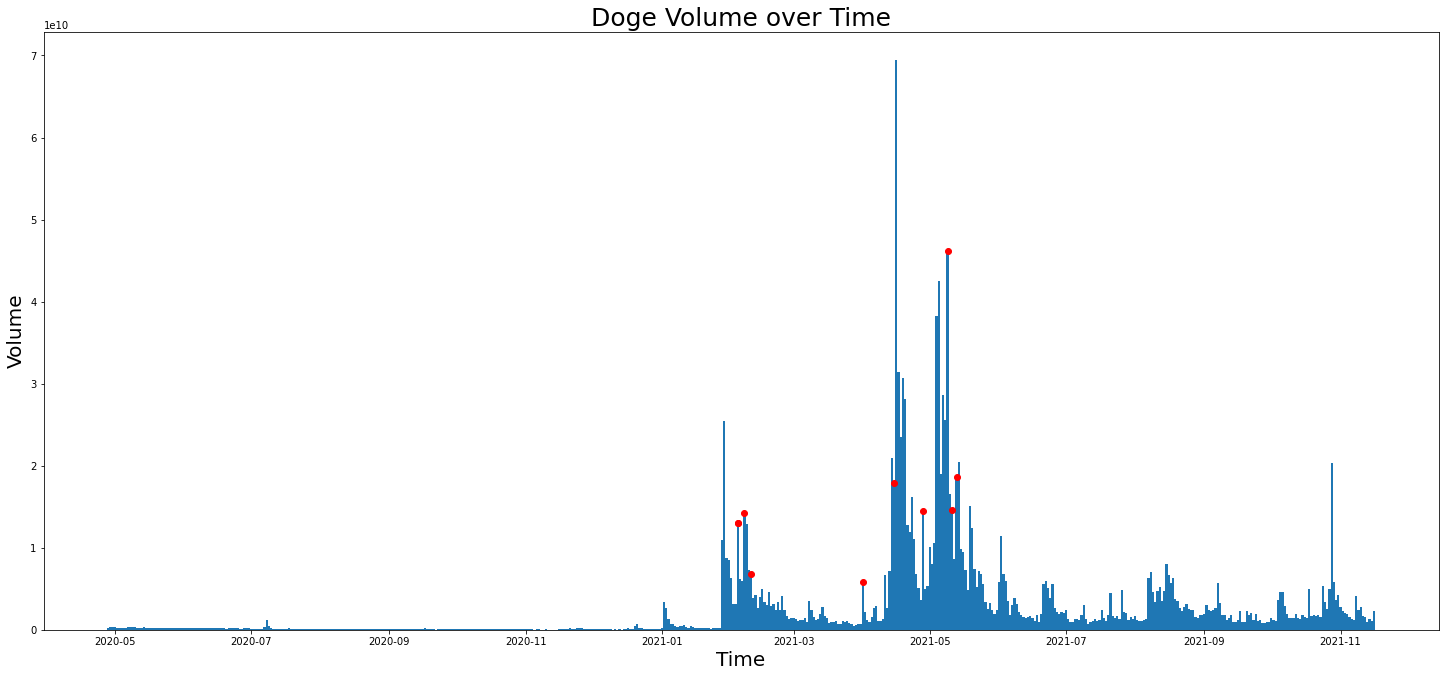

In [159]:
plt.figure(figsize = (25, 11))
plt.bar(df_doge["Date"], df_doge["Volume"], width=1)
plt.plot(df_tweets['Date'], df_tweets["Volume"], '.r', markersize=12)
plt.title("Doge Volume over Time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("Volume", size=20)

In [160]:
def test_stationarity(x, log="non-stationary"):
    '''Test stationarity of a Time Series variable.'''
    
    # Perform Dickey Fuller test    
    result = adfuller(x, autolag='AIC')
    print('ADF Stastistic: %f'%result[0])
    print('p-value: %f'%result[1])
    pvalue=result[1]

    
    for key,value in result[4].items():
        if result[0]>value:
            print("The graph is non stationary! (it has a trend)")
            break
        else:
            print("The graph is stationary! (it doesn't have a trend)")
            break
    
    print('Critical values:')
    for key,value in result[4].items():
        print('\t%s: %.3f ' % (key, value))
    
    # Determing rolling statistics
    rolmean = x.rolling(window=22,center=False).mean()
    rolstd = x.rolling(window=12,center=False).std()
    
    # Plot rolling statistics:
    plt.figure(figsize=(25, 11))
    orig = plt.plot(x, lw=3, label='Original')
    mean = plt.plot(rolmean, lw=2.5, ls="--",  label='Rolling Mean')
    std = plt.plot(rolstd, lw=3, label = 'Rolling Std')
    plt.legend(loc='best', fontsize=20)
    plt.title('Rolling Mean & Standard Deviation', size=25)
    plt.show(block=False)
    

ADF Stastistic: -1.927670
p-value: 0.319158
The graph is non stationary! (it has a trend)
Critical values:
	1%: -3.442 
	5%: -2.867 
	10%: -2.570 


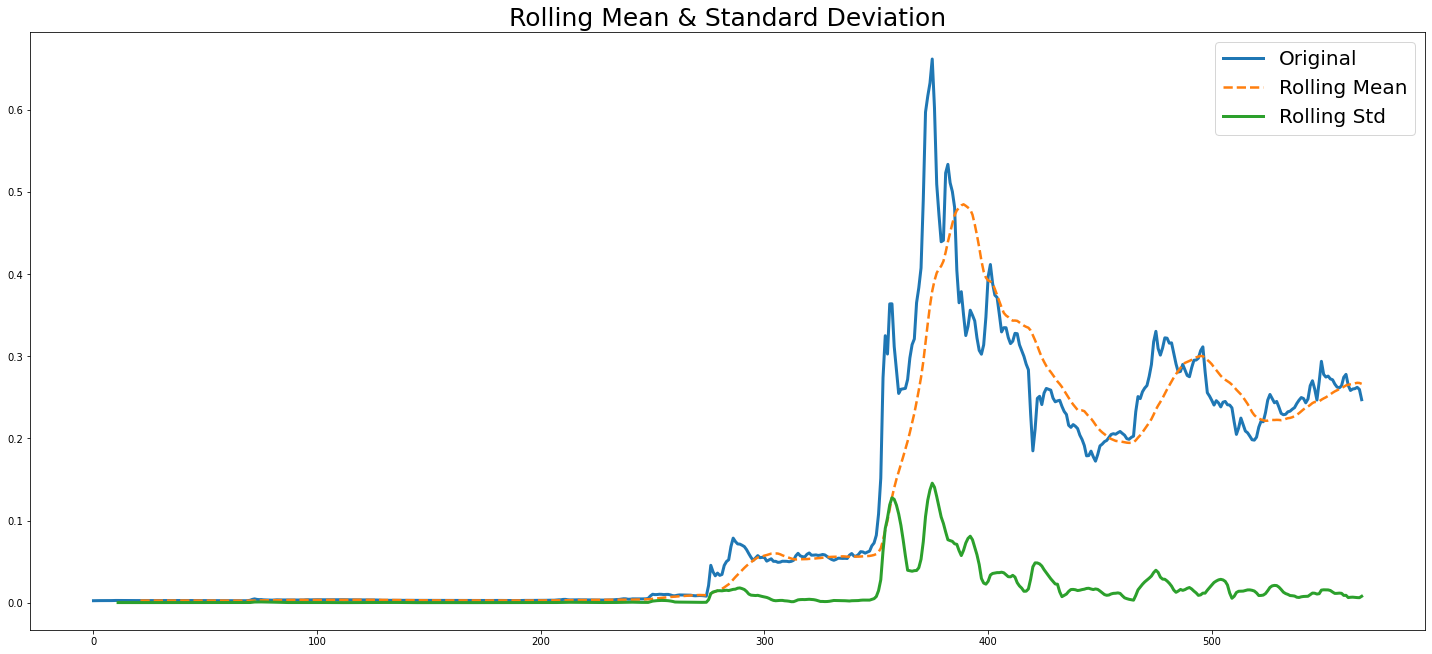

In [161]:
# Stationarity for price
price = pd.Series(df_doge["Mean_Price"].to_list())
test_stationarity(price, log="non-stationary")

# Man könnte hier vielleicht eine Reversionsrate berechnen und darauf aufbauend das Event-Window für CAR wählen.

ADF Stastistic: -4.680474
p-value: 0.000092
The graph is stationary! (it doesn't have a trend)
Critical values:
	1%: -3.442 
	5%: -2.867 
	10%: -2.570 


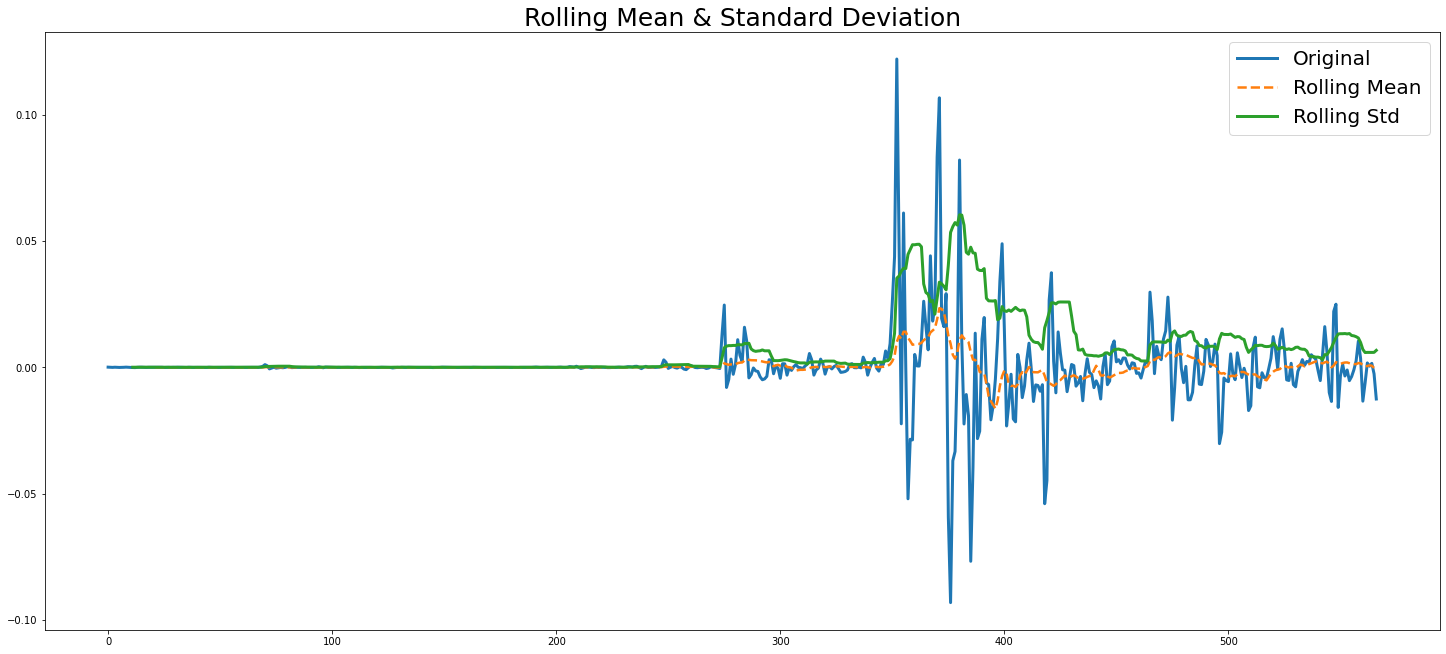

In [162]:
# Test for I(1)
d_price = []
price = price.to_list()
# log_price = log_price.to_list()

for i in range(1, len(price)):
    d_price.append(price[i] - price[i-1])

d_log_price = pd.Series(d_price)
test_stationarity(d_log_price, log="stationary")

ADF Stastistic: -0.722369
p-value: 0.840870
The graph is non stationary! (it has a trend)
Critical values:
	1%: -3.442 
	5%: -2.867 
	10%: -2.570 


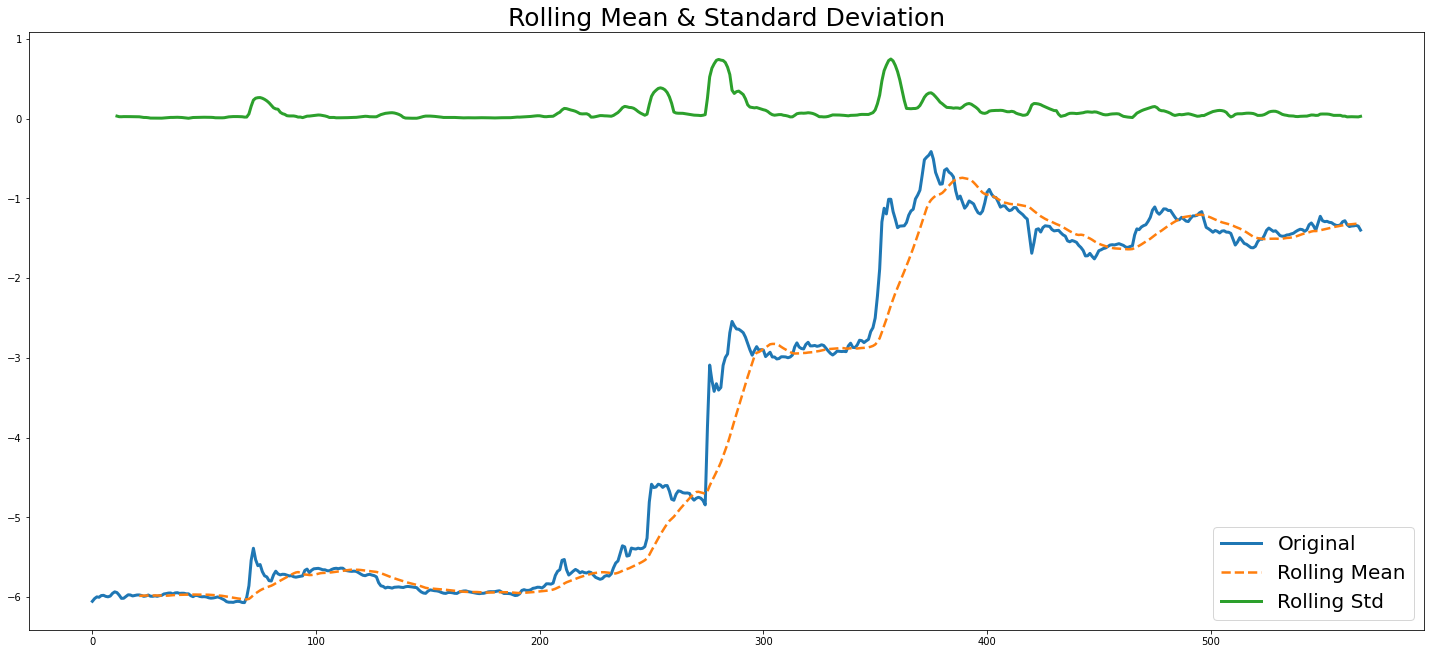

In [163]:
# Adjust by applying natural log over the series
log_price = np.log(df_doge["Mean_Price"])

log_price = pd.Series(log_price)
test_stationarity(log_price, log="stationary")

ADF Stastistic: -6.991636
p-value: 0.000000
The graph is stationary! (it doesn't have a trend)
Critical values:
	1%: -3.442 
	5%: -2.867 
	10%: -2.570 


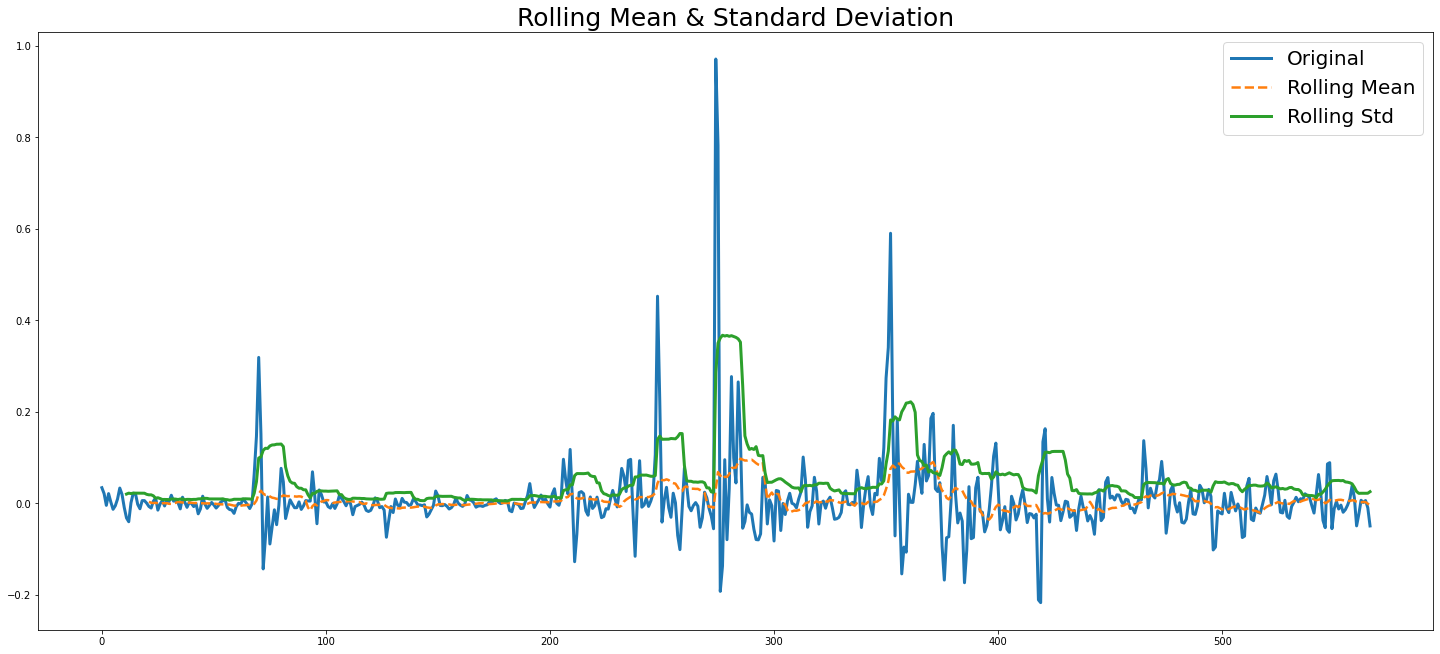

In [164]:
# Testing d_log(price)
d_log_price = []
log_price = log_price.to_list()
# log_price = log_price.to_list()

for i in range(1, len(log_price)):
    d_log_price.append(log_price[i] - log_price[i-1])

d_log_price = pd.Series(d_log_price)
test_stationarity(d_log_price, log="stationary")